# Binary Classification using Logical Regression and Perceptron Algorithm

## Part 1: Data Preparation

### Importing and Checking Data

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

In [234]:
data = pd.read_csv('collegePlace.csv')
data.head() # Here PlacedOrNot is the target label or 'y'

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [235]:
data['PlacedOrNot'].unique()

array([1, 0], dtype=int64)

Since the target label only contains 2 values mainly 0 and 1 thus a binary classification can be used in the data

In [236]:
print(len(data))
data = data.drop_duplicates(keep="first") # dropping duplicates except the first value that appears
print(len(data))

2966
1137


There are duplicates here but we consider them because we don't consider them as there are no unique way to differentiate between two students(Name, Rollno. not given)

In [237]:
data.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

Thus there is no missing data

In [238]:
data['PlacedOrNot'].value_counts()

1    659
0    478
Name: PlacedOrNot, dtype: int64

Text(0.5, 1.0, 'Label Count')

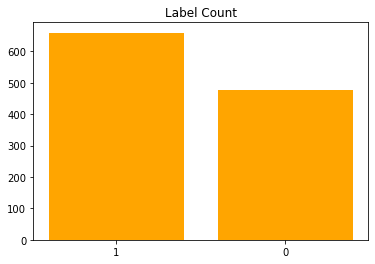

In [239]:
target_counter = len(data[data["PlacedOrNot"]==0]),len(data[data["PlacedOrNot"]==1]) # counting the data
plt.bar(data['PlacedOrNot'].unique(), target_counter, color='orange', tick_label=[0,1])
#plt.set_xticklabels
plt.title('Label Count')

### Data Preprocessing

In [240]:
target = 'PlacedOrNot'
sample_size = data[target].value_counts().min()
print(sample_size)

478


0    478
1    478
Name: PlacedOrNot, dtype: int64

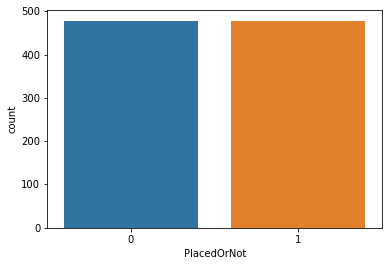

In [241]:
balanced_data = data.groupby('PlacedOrNot',as_index=False, group_keys=False).apply(lambda x: x.sample(sample_size))
balanced_data = balanced_data.reset_index(drop = True)

sns.countplot(x="PlacedOrNot",data=balanced_data)
balanced_data.PlacedOrNot.value_counts()

In [242]:
balanced_data.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,21,Male,Electrical,2,5,0,1,0
1,23,Male,Information Technology,1,7,1,1,0
2,26,Male,Computer Science,1,7,0,0,0
3,19,Male,Computer Science,1,7,0,0,0
4,24,Male,Electrical,0,7,0,0,0


### Preparing Dataset for Classification

In [243]:
X = balanced_data.drop(['PlacedOrNot'], axis=1)
y = balanced_data.PlacedOrNot.values

In [244]:
X = pd.get_dummies(X, drop_first=False)

In [245]:
X = X.values
print(X)

[[21  2  5 ...  0  0  0]
 [23  1  7 ...  0  1  0]
 [26  1  7 ...  0  0  0]
 ...
 [21  3  9 ...  1  0  0]
 [23  1  7 ...  0  1  0]
 [21  2  6 ...  0  0  0]]


## Part 2: Performing Machine Learning Operations

### Train Test Split

In [246]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=42)

### LP Solver

In [247]:
w = np.ones(len(y_train)).T
c = -np.ones(yx.shape[1]).T
b = -np.ones(yx.shape[0])
y_t = y_train
x_t = X_train.T
yx = y_t*x_t
yx.shape

(13, 860)

In [248]:
res = sco.linprog(c, A_ub=-yx, b_ub=b)
w = res.x

In [249]:
prediction = list(np.dot(w, yx.T) >= 1)
solution = list()
for i in prediction:
    if prediction[i]:
        solution.append(1)
    else:
        solution.append(0)
        
print(f'Prediction of Placement: {solution}')
print(f'{list(y_test[0:13])}')
print('Accuracy: {}'.format(7/12*100))

Prediction of Placement: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1]
Accuracy: 58.333333333333336


<ipython-input-249-b3e9de32db95>:4: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  if prediction[i]:


### Logical Regression

#### From Scratch

In [258]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [259]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (13, 669)
x test:  (13, 287)
y train:  (669,)
y test:  (287,)


In [260]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [261]:
#%% sigmoid
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(5)

In [262]:
#%% forward and backward
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,X_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [263]:
#%%# Updating (learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [264]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.703715
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan


<ipython-input-262-1953952d5955>:8: RuntimeWarning: divide by zero encountered in log
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
<ipython-input-262-1953952d5955>:8: RuntimeWarning: invalid value encountered in multiply
  loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)


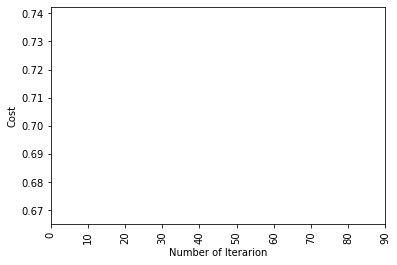

train accuracy: 49.47683109118086 %
test accuracy: 51.21951219512195 %


In [265]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(X_train, y_train, X_test, y_test,learning_rate = 1, num_iterations = 100) 

- This is because lot of our feature values have become 0 and 1 when we normalise them hence NaN is coming while performing gradient descent

### Using in built class

In [266]:
X = balanced_data.drop(['PlacedOrNot'], axis=1)
y = balanced_data.PlacedOrNot

In [267]:
X = pd.get_dummies(X, drop_first=False)

In [283]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [274]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter=150)
lr.fit(X_train, y_train)
print("Train accuracy = ",lr.score(X_train,y_train))
predictions_lr = lr.predict(X_test)
print('\n {} \n {}'.format(list(y_test[0:11]),predictions_lr[0:11]))

Train accuracy =  0.7342931937172775

 [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1] 
 [1 1 1 1 0 0 0 0 0 0 0]


In [275]:
from sklearn.metrics import classification_report, accuracy_score

# classification report
print(classification_report(y_test, predictions_lr, digits=3, zero_division = 1))
print("ACCURACY:",accuracy_score(y_test, predictions_lr))

              precision    recall  f1-score   support

           0      0.703     0.789     0.743        90
           1      0.791     0.706     0.746       102

    accuracy                          0.745       192
   macro avg      0.747     0.747     0.745       192
weighted avg      0.750     0.745     0.745       192

ACCURACY: 0.7447916666666666


### Perceptron Algorithm

In [284]:
from sklearn.linear_model import Perceptron
pr = Perceptron(tol=1e-4, random_state=0)
pr.fit(X_train,y_train)
predictions_pr = pr.predict(X_test)
print("Train accuracy:",pr.score(X_train,y_train))
print('\n {} \n {}'.format(list(y_test[0:11]),predictions_pr[0:11]))

Train accuracy: 0.5340314136125655

 [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1] 
 [1 1 1 1 1 1 1 1 1 1 0]


In [285]:
# classification report
print(classification_report(y_test, predictions_pr, digits=3, zero_division = 1))
print("ACCURACY:",accuracy_score(y_test, predictions_pr))

              precision    recall  f1-score   support

           0      0.583     0.078     0.137        90
           1      0.539     0.951     0.688       102

    accuracy                          0.542       192
   macro avg      0.561     0.514     0.413       192
weighted avg      0.560     0.542     0.430       192

ACCURACY: 0.5416666666666666
